In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import sys
sys.path.append('/Users/af/Work/Cosmo/codes/1d/build')
#sys.path.append('/Users/af/Work/Cosmo/codes/1d/debug')
print(sys.path)
import extruct
import numpy as np
import matplotlib.pyplot as plt



['/Users/af/Work/Cosmo/codes/1d', '/Users/af/miniconda3/envs/cobenv/lib/python37.zip', '/Users/af/miniconda3/envs/cobenv/lib/python3.7', '/Users/af/miniconda3/envs/cobenv/lib/python3.7/lib-dynload', '', '/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages', '/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages/IPython/extensions', '/Users/af/.ipython', '/Users/af/Work/Cosmo/codes/1d/build']


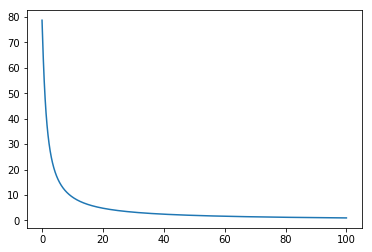

In [8]:
# h = 0.7
# Om = 0.3
# bg = extruct.Background()
# bg = extruct.Background(50, 0, Om, h, 0)
# bg.integrate()

# t = np.zeros(N)
# D1 = np.zeros(N)
# D2 = np.zeros(N)
# i = 0
# taufin = 60
# for tau in np.linspace(0,taufin,N): 
#     a[i] = bg.getScaleFactor(tau)
#     D1[i] = bg.getD1(tau)
#     D2[i] = bg.getD2(tau)
#     t[i] = bg.getPhysTime(tau)
#     i = i+1
    

    
# plt.plot(a2, a2-1/(1+zs))
# plt.show()
# plt.figure(figsize=(10, 10), dpi= 200)
# plt.plot(a, D1)
# plt.plot(a, 0.4*a/h/Om, '.')
# plt.show()

#plt.figure(figsize=(10, 10), dpi= 200)
#plt.semilogy(a, D2)
#plt.semilogy(a, np.sqrt(Om/a**3 + 1 - Om), '.')

#plt.figure(figsize=(10, 10), dpi= 200)
#plt.plot(a, np.gradient(np.gradient(D1))/(taufin/N)**2)
#plt.plot(a, 1.5*Om*a*D1*h**2)
#plt.show()

zin = 100
zfin = 0
h = 0.7
Om = 0.3
Oc = 0
L = 0.1


bg = extruct.Background(zin, zfin, Om, h, Oc)
bg.integrate()

N = 5000
D = np.zeros(N)
#a2 = np.zeros(N)

zs = np.linspace(zin,zfin,N)
i = 0
for z in zs:
    D[i] = bg.getGrowth(z)
    i = i+1
    
plt.plot(zs, D)
plt.show()

pspecOld = extruct.PowerLaw()
BBKS = extruct.BBKS(bg, L, True)




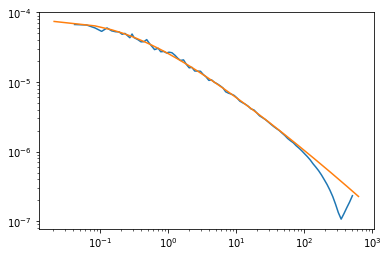

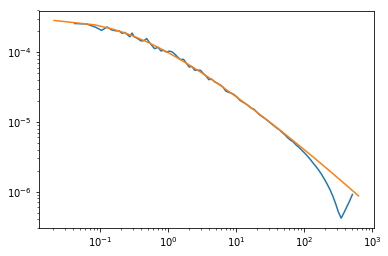

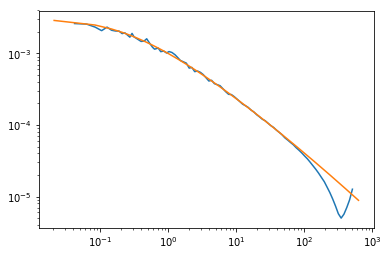

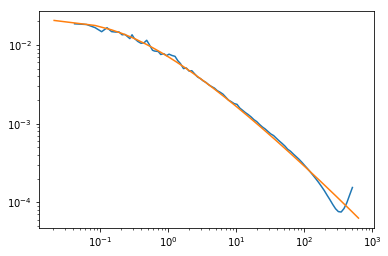

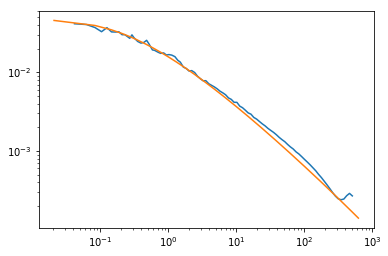

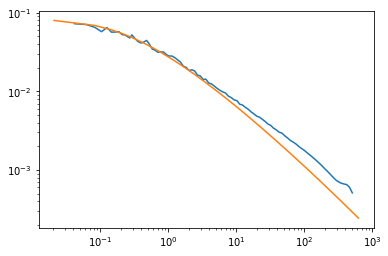

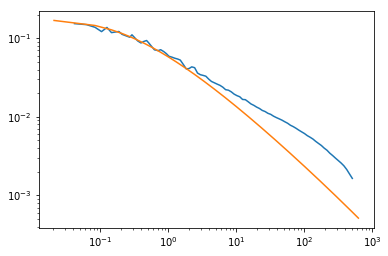

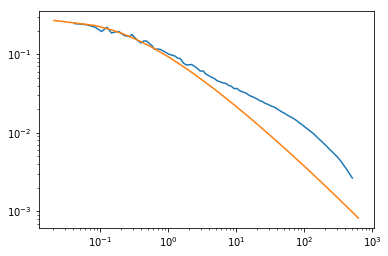

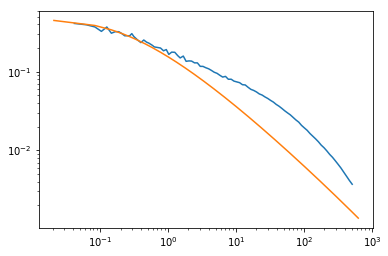

In [10]:
def running_mean(x, N):
    #cumsum = np.cumsum(np.insert(x, 0, 0)) 
    #return (cumsum[N:] - cumsum[:-N]) / float(N)
    return x
    #return np.convolve(x, np.ones((N,))/N, mode='valid')


god = extruct.Multiverse(0)


#pspec.A = 0.00000000004
BBKS.A = 1e-2   #1e-12 or -11 look good 
nParticles = 1024*64
zin = 100

pk = np.zeros(10000)
k = np.zeros(10000)

for i in range(pk.size):
    k[i] = (3*i+1)*2*np.pi/(L*2997.92348)
    pk[i] = BBKS.eval_dimless(3*i+1)*(L*2997.92348)

# 1. Densities, 16*1024 particles
# 2. 1024 particles, Pk
# 3. change to 256 
# 4. change back to 100, 2*1024 particles, 200 universes

for i in range(1,500):
    god.bang(nParticles, bg, BBKS, L, 1) 
  
#m_den = extruct.DensityObs(100)

#god.measure(uni1, m_den)

denObs = extruct.DensityObs(100)
denObs2 = extruct.DensityObs2(200)
dispObs = extruct.DisplacementField(1024)
collObs = extruct.CollisionObs(500)


pkObs1 = extruct.PowerSpectrumObs(0,np.int(80),L, np.int(2*nParticles/128/8))
pkObs2 = extruct.PowerSpectrumObs(1,np.int(80),L,np.int(2*nParticles/64/4)) #can do 512 for single universe with 1024
pkObsFFT = extruct.PowerSpectrumObs(2, np.int(100),L,1)


psdenObs = extruct.PhaseSpaceDensityObs(300)
#corrObs = extruct.CorrelationFunctionObs(0, 1000)
#pk3DObsDeriv = extruct.PowerSpectrum3DObs(0, 4096)
#pk3DObsFFT = extruct.PowerSpectrum3DObs(1, 4096)

for z in [zin-1, 50, 15, 5, 3, 2, 1, 0.5, 0]: #[zin-1, 50, 20, 10, 5, 3, 2, 1.5, 1, 0.75, 0.5, 0.25, 0]:

    god.evolveAll(z)

#    god.measureAll(pkObs1)
    
    
    
    
 #   god.measureAll(pkObsFFT)
    
#    god.measureAll(denObs)

#    god.measureAll(corrObs)

 #   god.measureAll(pk3DObsDeriv)

#    pk1 = pkObs1.getResult()
    
#     ##################################

#     god.measureAll(denObs2)
#     god.measureAll(psdenObs)
#     god.measureAll(collObs)

#     den2 = denObs2.getResult()
#     disp = dispObs.getResult()
#     psden = psdenObs.getResult()
#     coll = collObs.getResult()
    
    
#     plt.imshow(np.log(psden.T), interpolation='nearest')
#     plt.show()
#     plt.plot(den2[0,:]-0.5,den2[1,:])
#     plt.show()
#     plt.plot(coll[0,:]-0.5,coll[1,:])
#     plt.show()
    
    ###################################
    
#    god.measureAll(pkObs2)
    god.measureAll(pkObsFFT)
#    pk2 = pkObs2.getResult()
    pkFFT = pkObsFFT.getResult()
#    plt.loglog(pk2[0,1:], pk2[1,1:])
    plt.loglog(pkFFT[0,1:], pkFFT[1,1:]/nParticles**2)
    plt.loglog(k, bg.getGrowth(z)**2*pk)
    plt.show()
    
    
########

#     god.measureAll(dispObs)
#     disp = dispObs.getResult()
#     plt.plot(disp[0,:])
#     plt.show()

###################
    
   # pk22 = pkObs2.getResult()
 #   pkFFT = pkObsFFT.getResult()
 #   den = denObs.getResult()
    
 #   coll = collObs.getResult()
    
 #   corr = corrObs.getResult()


#    pk3DFFT = pk3DObsFFT.getResult()
#    pk3DDeriv = pk3DObsDeriv.getResult()

#     plt.plot(pkFFT[1,2000:2100])
#     plt.show
    
#     plt.plot(disp[0,1:50])
#     plt.show()
#     k=np.linspace(0,disp.size*np.pi*2,disp.size)
#     ft = np.fft.fft(disp[0,:])*k;
#     fth = np.split(ft,2)[0] 
#     kh = np.split(k,2)[0]
#     plt.loglog(kh,fth * np.conj(fth))
#     plt.show()
    
   
#    plt.loglog(pkFFT[0,1:], pkFFT[1,1:],50)
#    plt.ylim(1e-6, 1e-4)
#    plt.show()
#    plt.loglog(pk2[0,1:],pk2[1,1:])



#    plt.ylim(1e-6, 1e-4)
#     #plt.ylim(1e-3, 1)
#    plt.show()
#    plt.loglog(pk1[0,1:],pk1[1,1:])
#    plt.show()
    
    
 #   plt.loglog(pk3DDeriv[0,:], running_mean(np.abs(pk3DDeriv[1,:]),2))
 #   plt.loglog(pk3DFFT[0,:], running_mean(np.abs(pk3DFFT[1,:]),2))
 #   plt.show()
    
    
    
#    plt.loglog(pk1[0,:],pk1[1,:])
#    plt.loglog(pkFFT[0,:],pkFFT[1,:])
 #   plt.loglog(pk2[0,:],pk2[1,:])
 #   plt.show()
   


 #   plt.figure(figsize=(50, 50)) #, dpi= 200)
    
    #plt.plot(den[0,:]-0.5,den[1,:])
    
    
    #plt.plot(pk[0,:],pk[1,:])
  #  plt.show()
  #  plt.plot(corr[0,:],corr[1,:])
    
   # plt.show()
    
    

In [11]:
BBKS.eval_dimless(1)*(L*2997.92348)

7.275665503006414e-05

In [2]:
god.evolveAll(0.1)

NameError: name 'god' is not defined

array([[ 1.5154046e-21,  1.4012985e-45,  1.5216763e-21,  1.4012985e-45,
         1.5216777e-21,  1.4012985e-45,  1.5414283e-44,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  1.1210388e-44,  0.0000000e+00,
         0.0000000e+00,  1.4012985e-45,  8.0282197e-28,  1.4012985e-45,
         0.0000000e+00,  0.0000000e+00, -1.1187908e+33,  4.5833670e-41,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         1.6815582e-44,  1.4012985e-45,  0.0000000e+00,  0.0000000e+00,
         1.6815582e-43,  7.8472714e-44,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.00000

In [8]:
uni1

0